In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
# FREQUENCY TABLE AND TOP 5 MOST LISTED PRODUCT

df_fequency_category = df["category"].value_counts()
df_fequency_category = df_fequency_category.reset_index()
df_fequency_category.columns = ['category', 'frequency']
top_categories = df_fequency_category.nlargest(5, 'frequency')



top_categories.head(5)

,category,frequency
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


##### Top 5 most listed = Sports & Outdoors / Beauty / Handmade Clothing, Shoes & Accessories / Bath & Body / Birthday Gifts

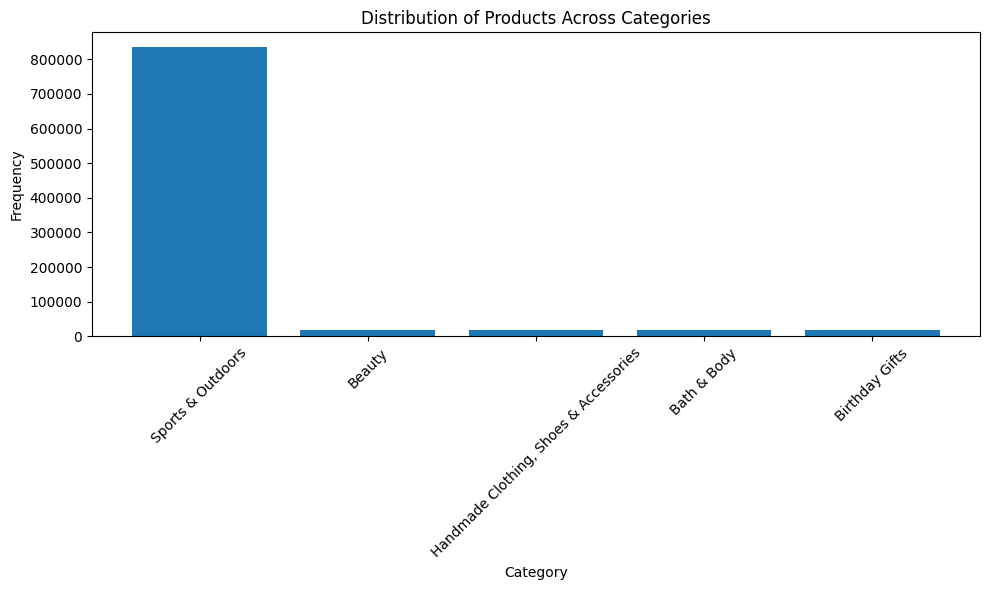

In [6]:
# BAR CHART
plt.figure(figsize=(10, 6))
plt.bar(top_categories['category'], top_categories['frequency'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Products Across Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

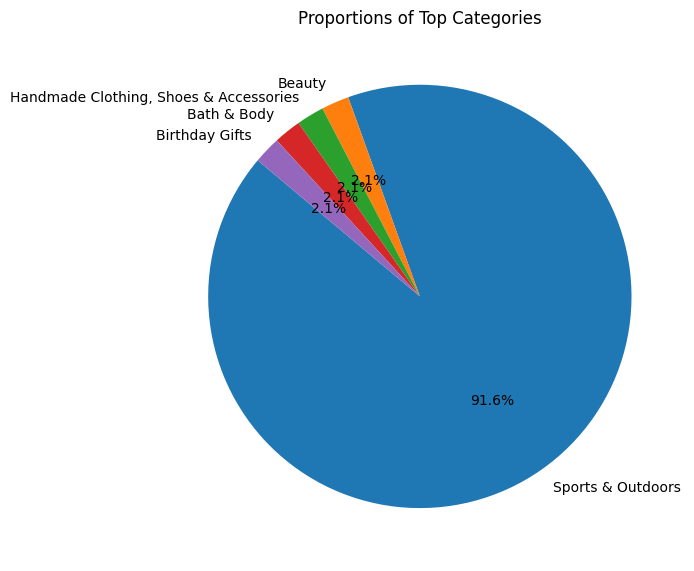

In [7]:
# PIE CHART

plt.figure(figsize=(7, 7))
plt.pie(top_categories['frequency'], labels=top_categories['category'], autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Top Categories')
plt.tight_layout()
plt.show()

##### Sports & Outdoors dominate the listings, followed by Beauty and Handmade Clothing, Shoes & Accessories, Bath & Body, and Birthday Gifts

In [8]:
mean_price = df['price'].mean()  # MEAN
median_price = df['price'].median()  # MEDIAN
mode_price = df['price'].mode()[0]  # MODE
variance = df['price'].var()  # VARIANCE
std_dev = df['price'].std()  # STANDAR DEVIATION
price_range = df['price'].max() - df['price'].min()  # RANGE
q1 = df['price'].quantile(0.25)  # 1ST QUARTILE
q3 = df['price'].quantile(0.75)  # 3RD QUARTILE
iqr = q3 - q1  # Interquartile range



print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("Mode Price:", mode_price)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Range:", price_range)
print("Interquartile Range:", iqr)

Mean Price: 89.24380943923663
Median Price: 19.09
Mode Price: 9.99
Variance: 119445.48532254907
Standard Deviation: 345.60886175349884
Range: 100000.0
Interquartile Range: 36.0


The average is around 89, while the most common price is 9.99, indicating that the average is heavily influenced by higher prices.
In this case, it is more appropriate to use the median for a better understanding of the data.

Product prices are very diverse, with a high level of price dispersion.
This can be verified using variance, the standard deviation, which is very high, the range, as well as the interquartile range, all of which demonstrate significant price dispersion.







<Axes: xlabel='price', ylabel='Count'>

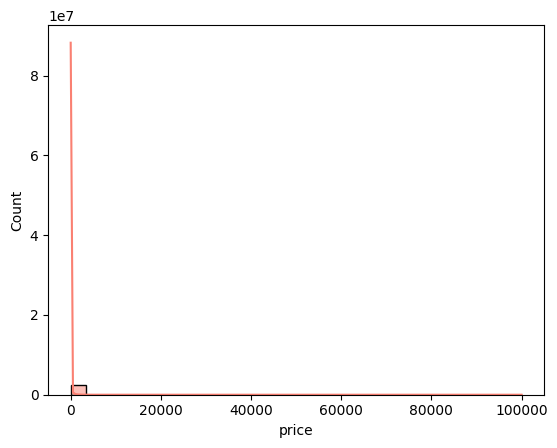

In [9]:
# Histogramme
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

Most prices are concentrated around the median, which is 19. The histogram is difficult to interpret due to the extreme values. I believe it is preferable to focus on data below 100 to justify the use of this histogram and make it more readable.

<Axes: xlabel='price', ylabel='Count'>

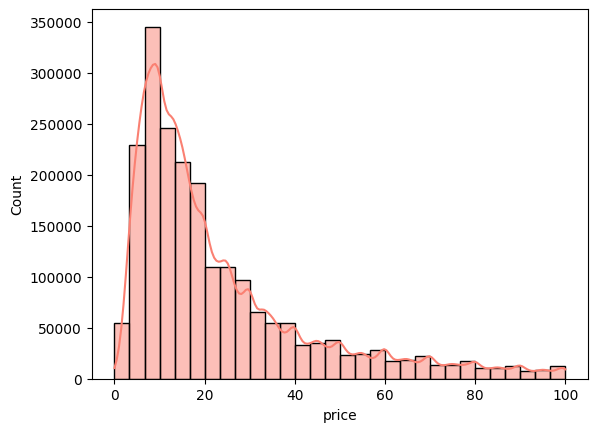

In [10]:
filtered_df = df[df['price'] < 100]

sns.histplot(filtered_df['price'], kde=True, bins=30, color="salmon")


<Axes: xlabel='price'>

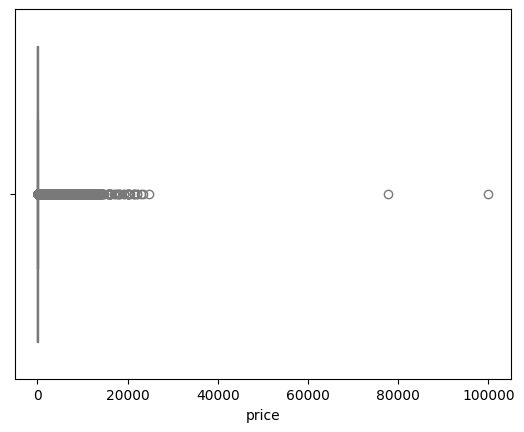

In [11]:
# Box Plot
sns.boxplot(x = df['price'], color="lightblue")

This box plot identifies outliers beyond 60,000.

In [12]:
mean_stars = df['stars'].mean()  # MEAN
median_stars = df['stars'].median()  # MEDIAN
mode_stars = df['stars'].mode()[0]  # MODE
variance = df['stars'].var()  # VARIANCE
std_dev = df['stars'].std()  # STANDARD DEVIATION
stars_range = df['stars'].max() - df['stars'].min()  # RANGE
q1 = df['stars'].quantile(0.25)  # 1ST QUARTILE
q3 = df['stars'].quantile(0.75)  # 3RD QUARTILE
iqr = q3 - q1  # Interquartile range

print("Mean Stars:", mean_stars)
print("Median Stars:", median_stars)
print("Mode Stars:", mode_stars)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Range:", stars_range)
print("Interquartile Range:", iqr)

Mean Stars: 2.152836472966065
Median Stars: 0.0
Mode Stars: 0.0
Variance: 4.817434029796862
Standard Deviation: 2.1948653785134207
Range: 5.0
Interquartile Range: 4.4


The median and mode are at 0 because it seems that most products have no rating. The average is 2, but it is not very representative of the distribution of ratings given the significant number of unrated products.

As we can see with the variance, standard deviation ad interquartile range, there is a wide variation in the number of stars given to products.

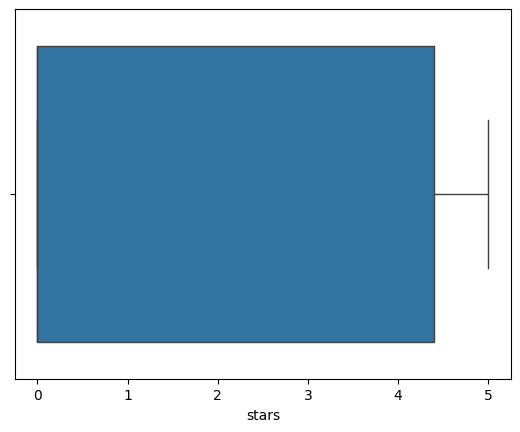

In [13]:
sns.boxplot(data=df, x='stars');
plt.show()

In [16]:
print(f"The skewness of 'rating' is: {df['stars'].skew(): .2f}")
print(f"The Kurtosis of 'rating' is: {df['stars'].kurt(): .2f}")



The skewness of 'rating' is:  0.08
The Kurtosis of 'rating' is: -1.93


The ratings are not perfectly normally distributed. However, the skewness close to 0 suggests the distribution does not significantly lean towards higher or lower values.

<Axes: xlabel='stars', ylabel='Count'>

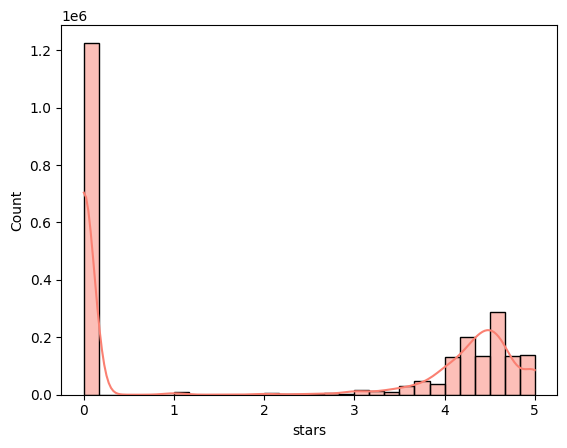

In [17]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")


As previously observed using the mode and median, 0 is the most common value. However, most of the ratings are concentrated between 4 and 5, which suggests that only satisfied customers take the time to leave a rating for their products.